<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/ML_Decision_Tree_sample_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
%matplotlib inline

<IPython.core.display.Javascript object>

In [ ]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = 'gray'

In [ ]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
os.listdir("weather-dataset-rattle-package")

['.ipynb_checkpoints',
 'breast-cancer-wisconsin-data-metadata.json',
 'weatherAUS.csv']

In [ ]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

Let's drop any rows where the value of the target column RainTomorrow in empty.

In [ ]:
raw_df.dropna(subset =['RainTomorrow'],inplace = True)

In [ ]:
raw_df.Sunshine.corr(raw_df.Rainfall)

-0.2275247963738967

In [ ]:
raw_df.Sunshine.corr(raw_df.Rainfall)

-0.2275247963738967

In [ ]:
raw_df.WindGustSpeed.corr(raw_df.Rainfall)

0.133496940663608

# Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

Create a train/test/validation spl.it
Identify input and target colu.m ns
Identify numeric and categorical col.u mns
Impute (fill) missing numeric v.a lues
Scale numeric values t0
,
1
)
.
 (0,1) range
Encode categorical columns to on.e-hot vectors

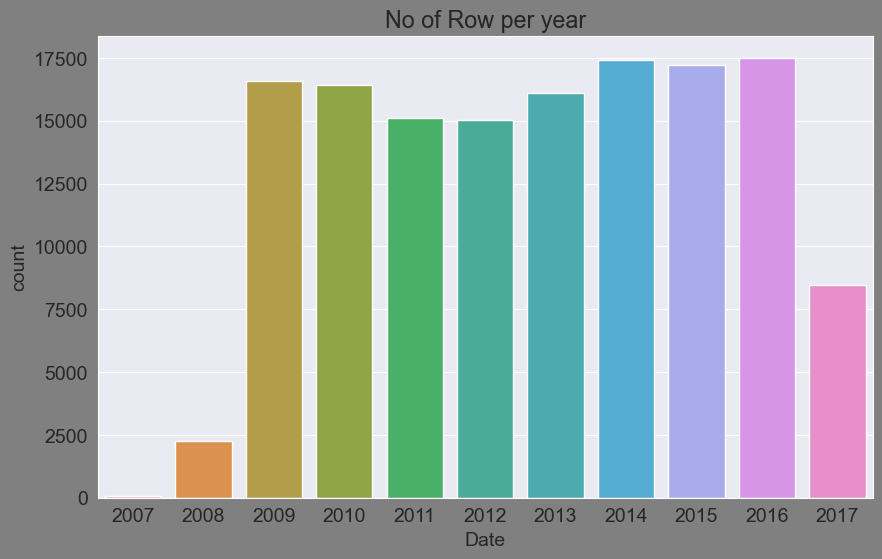

In [ ]:
plt.title('No of Row per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

 separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

In [ ]:
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
144548       NaN         SSE           43.0        ESE        SSE   
144549       NaN          NE           31.0        ENE         SW   
144550       NaN         ESE           39.0        ESE        SSE   
144551       NaN         ESE           43.0        ESE        SSW   
144552       NaN         WNW           76.0        ENE        SSW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
144548       1009.8       NaN       NaN     23.7     31.8        No   
144549       1007.6       NaN       NaN     28.9     34.8        No   
144550       1008.0       NaN       NaN     29.7     35.7        No   
144551       1009.2       NaN       NaN     29.8     37.2        No   
144552       1006.2       NaN       NaN     30.1     37.4        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
144548           No  
144549           No  
144550           No  
144551           No  
144552           No  

[98988 rows x 23 columns]

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
2133         NaN         WSW           30.0        ESE          W   
2134         NaN          NE           56.0        ESE        ESE   
2135         NaN         NNE           48.0         NE          N   
2136         NaN         NNE           41.0        ESE          W   
2137         NaN           E           33.0        SSE         SE   
...          ...         ...            ...        ...        ...   
144913       NaN           E           52.0        ESE          E   
144914       NaN         ESE           54.0          E        ESE   
144915       NaN           E           56.0          E         SE   
144916       NaN           E           59.0          E        SSE   
144917       NaN          SE           56.0        ESE          S   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2133             7.0          11.0         45.0         14.0       1013.5   
2134             9.0           9.0         45.0         12.0       1016.0   
2135            20.0          20.0         35.0         19.0       1017.9   
2136             7.0           7.0         46.0         37.0       1013.6   
2137             7.0           9.0         60.0         34.0       1017.4   
...              ...           ...          ...          ...          ...   
144913          35.0          20.0         23.0         12.0       1013.2   
144914          30.0          31.0         17.0          7.0       1014.7   
144915          33.0          22.0         12.0          7.0       1012.6   
144916          20.0          17.0         12.0         12.0       1007.2   
144917          20.0          28.0         46.0         18.0       1007.3   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
2133         1011.0       NaN       NaN     21.0     32.7        No   
2134         1012.4       NaN       NaN     25.6     38.2        No   
2135         1012.3       NaN       NaN     29.2     37.0        No   
2136         1012.1       8.0       5.0     27.4     30.9        No   
2137         1014.7       8.0       NaN     25.6     32.5        No   
...             ...       ...       ...      ...      ...       ...   
144913       1010.1       NaN       NaN     24.3     33.0        No   
144914       1010.9       NaN       NaN     26.7     35.0        No   
144915       1007.5       NaN       NaN     28.1     34.7        No   
144916       1002.6       NaN       1.0     31.3     38.4        No   
144917       1003.7       NaN       NaN     25.8     35.8        No   

       RainTomorrow  
2133             No  
2134             No  
2135             No  
2136             No  
2137             No  
...             ...  
144913           No  
144914           No  
144915           No  
144916           No  
144917           No  

[17231 rows x 23 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
2498         NaN         ENE           54.0        NaN        ESE   
2499         NaN         SSE           50.0        SSE         SE   
2500         NaN         ENE           48.0        ESE        ENE   
2501         NaN         SSE           39.0         SE        SSE   
2502         NaN         ENE           31.0         SE        SSE   
...          ...         ...            ...        ...        ...   
145454       NaN           E           31.0        ESE          E   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498             0.0           7.0         46.0         17.0       1013.4   
2499             9.0          17.0         54.0         30.0       1011.1   
2500            11.0          39.0         62.0         67.0       1014.0   
2501             9.0          17.0         74.0         65.0       1017.9   
2502             6.0           9.0         92.0         63.0       1016.3   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
2498         1009.2       7.0       3.0     26.1     36.7        No   
2499         1008.4       8.0       8.0     24.8     31.7        No   
2500         1014.8       8.0       8.0     21.8     19.5       Yes   
2501         1016.5       8.0       8.0     19.2     21.6       Yes   
2502         1013.9       8.0       8.0     17.2     22.2       Yes   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2       NaN       NaN      9.4     20.9        No   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   

       RainTomorrow  
2498             No  
2499            Yes  
2500            Yes  
2501            Yes  
2502             No  
...             ...  
145454           No  
145455           No  
145456           No  
145457           No  
145458           No  

[25974 rows x 23 columns]

In [ ]:
print('traindf shape',train_df.shape)
print('valdf shape',val_df.shape)
print('testdf shape',test_df.shape)

traindf shape (98988, 23)
valdf shape (17231, 23)
testdf shape (25974, 23)


# Input and Target Columns


In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [ ]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

Let's also identify the numeric and categorical columns.

In [ ]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_col = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
print(categorical_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
train_inputs.WindSpeed9am.corr(train_inputs.Rainfall)

0.0850744554722448

In [ ]:
train_inputs.Temp3pm.corr(train_inputs.MinTemp)

0.7025365191268013

# Imputing missing numeric values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols]= imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]= imputer.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
val_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037723  0.525852       0.294574   
1       0.375000  0.565217  0.000000     0.037723  0.525852       0.294574   
2       0.504717  0.576560  0.000000     0.037723  0.525852       0.310078   
3       0.417453  0.620038  0.000000     0.037723  0.525852       0.139535   
4       0.613208  0.701323  0.002695     0.037723  0.525852       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037723  0.525852       0.286822   
144549  0.556604  0.786389  0.000000     0.037723  0.525852       0.193798   
144550  0.608491  0.805293  0.000000     0.037723  0.525852       0.255814   
144551  0.674528  0.818526  0.000000     0.037723  0.525852       0.286822   
144552  0.731132  0.839319  0.000000     0.037723  0.525852       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0            0.4800  0.888889  0.500352  0.508439  0.522073  
1            0.4912  0.493021  0.500352  0.514768  0.570058  
2            0.5056  0.493021  0.222222  0.594937  0.548944  
3            0.5712  0.493021  0.500352  0.533755  0.612284  
4            0.4624  0.777778  0.888889  0.527426  0.673704  
...             ...       ...       ...       ...       ...  
144548       0.5232  0.493021  0.500352  0.651899  0.714012  
144549       0.4880  0.493021  0.500352  0.761603  0.771593  
144550       0.4944  0.493021  0.500352  0.778481  0.788868  
144551       0.5136  0.493021  0.500352  0.780591  0.817658  
144552       0.4656  0.493021  0.500352  0.786920  0.821497  

[98988 rows x 16 columns]

In [ ]:
val_inputs.describe().loc[['min','max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

# Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse = False ,handle_unknown = 'ignore' ).fit(raw_df[categorical_col])

D:\ananconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_col))

In [ ]:
train_inputs[encoded_cols]= encoder.transform(train_inputs[categorical_col])
val_inputs[encoded_cols]= encoder.transform(val_inputs[categorical_col])
test_inputs[encoded_cols]= encoder.transform(test_inputs[categorical_col])

C:\Users\ABDULLAH COMPUTERS\AppData\Local\Temp\ipykernel_13304\3193288016.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]= encoder.transform(train_inputs[categorical_col])
C:\Users\ABDULLAH COMPUTERS\AppData\Local\Temp\ipykernel_13304\3193288016.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]= encoder.transform(train_inputs[categorical_col])
C:\Users\ABDULLAH COMPUTERS\AppData\Local\Temp\ipykernel_13304\3193288016.py:1: PerformanceWarning: DataFrame is highly fragment

In [ ]:
test_inputs[encoded_cols]

Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                    0.0                     0.0                0.0   
145456                    0.0                     0.0                0.0   
145457                    0.0                     0.0                0.0   
145458                    0.0                     0.0                0.0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  \
2498                 0.0                0.0              0.0   
2499                 0.0                0.0              0.0   
2500                 0.0                0.0              0.0   
2501                 0.0                0.0              0.0   
2502                 0.0                0.0              0.0   
...                  ...                ...              ...   
145454               0.0                0.0              0.0   
145455               0.0                0.0              0.0   
145456               0.0                0.0              0.0   
145457               0.0                0.0              0.0   
145458               0.0                0.0              0.0   

        Location_Canberra  Location_Cobar  Location_CoffsHarbour  \
2498                  0.0             0.0                    0.0   
2499                  0.0             0.0                    0.0   
2500                  0.0             0.0                    0.0   
2501                  0.0             0.0                    0.0   
2502                  0.0             0.0                    0.0   
...                   ...             ...                    ...   
145454                0.0             0.0                    0.0   
145455                0.0             0.0                    0.0   
145456                0.0             0.0                    0.0   
145457                0.0             0.0                    0.0   
145458                0.0             0.0                    0.0   

        Location_Dartmoor  Location_Darwin  Location_GoldCoast  \
2498                  0.0              0.0                 0.0   
2499                  0.0              0.0                 0.0   
2500                  0.0              0.0                 0.0   
2501                  0.0              0.0                 0.0   
2502                  0.0              0.0                 0.0   
...                   ...              ...                 ...   
145454                0.0              0.0                 0.0   
145455                0.0              0.0                 0.0   
145456                0.0              0.0                 0.0   
145457                0.0              0.0                 0.0   
145458                0.0 

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [ ]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
x_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2498    0.681604  0.801512  0.000000     0.037723  0.525852       0.372093   
2499    0.693396  0.725898  0.001078     0.037723  0.525852       0.341085   
2500    0.634434  0.527410  0.005930     0.037723  0.525852       0.325581   
2501    0.608491  0.538752  0.042049     0.037723  0.525852       0.255814   
2502    0.566038  0.523629  0.018329     0.037723  0.525852       0.193798   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037723  0.525852       0.193798   
145455  0.266509  0.533081  0.000000     0.037723  0.525852       0.193798   
145456  0.285377  0.568998  0.000000     0.037723  0.525852       0.124031   
145457  0.327830  0.599244  0.000000     0.037723  0.525852       0.240310   
145458  0.384434  0.601134  0.000000     0.037723  0.525852       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498        0.000000      0.080460         0.46         0.17     0.543802   
2499        0.069231      0.195402         0.54         0.30     0.505785   
2500        0.084615      0.448276         0.62         0.67     0.553719   
2501        0.069231      0.195402         0.74         0.65     0.618182   
2502        0.046154      0.103448         0.92         0.63     0.591736   
...              ...           ...          ...          ...          ...   
145454      0.115385      0.149425         0.59         0.27     0.730579   
145455      0.100000      0.126437         0.51         0.24     0.728926   
145456      0.100000      0.103448         0.56         0.21     0.710744   
145457      0.069231      0.103448         0.53         0.24     0.669421   
145458      0.100000      0.080460         0.51         0.24     0.642975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2498         0.5136  0.777778  0.333333  0.702532  0.808061   
2499         0.5008  0.888889  0.888889  0.675105  0.712092   
2500         0.6032  0.888889  0.888889  0.611814  0.477927   
2501         0.6304  0.888889  0.888889  0.556962  0.518234   
2502         0.5888  0.888889  0.888889  0.514768  0.529750   
...             ...       ...       ...       ...       ...   
145454       0.7056  0.493021  0.500352  0.350211  0.504798   
145455       0.6912  0.493021  0.500352  0.364979  0.533589   
145456       0.6720  0.493021  0.500352  0.381857  0.573896   
145457       0.6352  0.493021  0.500352  0.415612  0.604607   
145458       0.6304  0.333333  0.222222  0.470464  0.602687   

        Location_Adelaide  Location_Albany  Location_Albury  \
2498                  0.0              0.0              1.0   
2499                  0.0              0.0              1.0   
2500                  0.0              0.0              1.0   
2501                  0.0              0.0              1.0   
2502                  0.0              0.0              1.0   
...                   ...              ...              ...   
145454                0.0              0.0              0.0   
145455                0.0              0.0              0.0   
145456                0.0              0.0              0.0   
145457                0.0              0.0              0.0   
145458                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2498                      0.0                     0.0                0.0   
2499                      0.0                     0.0                0.0   
2500                      0.0                     0.0                0.0   
2501                      0.0                     0.0                0.0   
2502                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
145454                    0.0                     0.0                0.0   
145455                   

In [ ]:
x_val

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
2133    0.469340  0.724008       0.0     0.037723  0.525852       0.186047   
2134    0.566038  0.839319       0.0     0.037723  0.525852       0.387597   
2135    0.603774  0.814745       0.0     0.037723  0.525852       0.325581   
2136    0.813679  0.716446       0.0     0.037723  0.525852       0.271318   
2137    0.648585  0.756144       0.0     0.037723  0.525852       0.209302   
...          ...       ...       ...          ...       ...            ...   
144913  0.683962  0.746692       0.0     0.037723  0.525852       0.356589   
144914  0.625000  0.778828       0.0     0.037723  0.525852       0.372093   
144915  0.613208  0.792060       0.0     0.037723  0.525852       0.387597   
144916  0.672170  0.826087       0.0     0.037723  0.525852       0.410853   
144917  0.655660  0.797732       0.0     0.037723  0.525852       0.387597   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2133        0.053846      0.126437         0.45         0.14     0.545455   
2134        0.069231      0.103448         0.45         0.12     0.586777   
2135        0.153846      0.229885         0.35         0.19     0.618182   
2136        0.053846      0.080460         0.46         0.37     0.547107   
2137        0.053846      0.103448         0.60         0.34     0.609917   
...              ...           ...          ...          ...          ...   
144913      0.269231      0.229885         0.23         0.12     0.540496   
144914      0.230769      0.356322         0.17         0.07     0.565289   
144915      0.253846      0.252874         0.12         0.07     0.530579   
144916      0.153846      0.195402         0.12         0.12     0.441322   
144917      0.153846      0.321839         0.46         0.18     0.442975   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
2133         0.5424  0.493021  0.500352  0.594937  0.731286   
2134         0.5648  0.493021  0.500352  0.691983  0.836852   
2135         0.5632  0.493021  0.500352  0.767932  0.813820   
2136         0.5600  0.888889  0.555556  0.729958  0.696737   
2137         0.6016  0.888889  0.500352  0.691983  0.727447   
...             ...       ...       ...       ...       ...   
144913       0.5280  0.493021  0.500352  0.664557  0.737044   
144914       0.5408  0.493021  0.500352  0.715190  0.775432   
144915       0.4864  0.493021  0.500352  0.744726  0.769674   
144916       0.4080  0.493021  0.111111  0.812236  0.840691   
144917       0.4256  0.493021  0.500352  0.696203  0.790787   

        Location_Adelaide  Location_Albany  Location_Albury  \
2133                  0.0              0.0              1.0   
2134                  0.0              0.0              1.0   
2135                  0.0              0.0              1.0   
2136                  0.0              0.0              1.0   
2137                  0.0              0.0              1.0   
...                   ...              ...              ...   
144913                0.0              0.0              0.0   
144914                0.0              0.0              0.0   
144915                0.0              0.0              0.0   
144916                0.0              0.0              0.0   
144917                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
2133                      0.0                     0.0                0.0   
2134                      0.0                     0.0                0.0   
2135                      0.0                     0.0                0.0   
2136                      0.0                     0.0                0.0   
2137                      0.0                     0.0                0.0   
...                       ...                     ...                ...   
144913                    0.0                     0.0                0.0   
144914                   

## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

# Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 42)

In [ ]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [ ]:
%%time
model.fit(x_train,train_target)

CPU times: total: 5.17 s
Wall time: 7.21 s


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

# EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
train_preds = model.predict(x_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(train_preds)

C:\Users\ABDULLAH COMPUTERS\AppData\Local\Temp\ipykernel_13304\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [ ]:
train_probs = model.predict_proba(x_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Let's check the accuracy of its predictions.

In [ ]:
accuracy_score(train_target , train_preds)

0.9999797955307714

we must evaluate the model on the validation set too.

In [ ]:
model.score(x_val,val_target)

0.7921188555510418

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No".

In [ ]:
(val_target.value_counts() /len(val_target)) * 100

RainTomorrow
No     78.828855
Yes    21.171145
Name: count, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples.
 This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

# VISUALISATION

We can visualize the decision tree learned from the training data.

In [ ]:
from sklearn.tree import plot_tree ,export_text

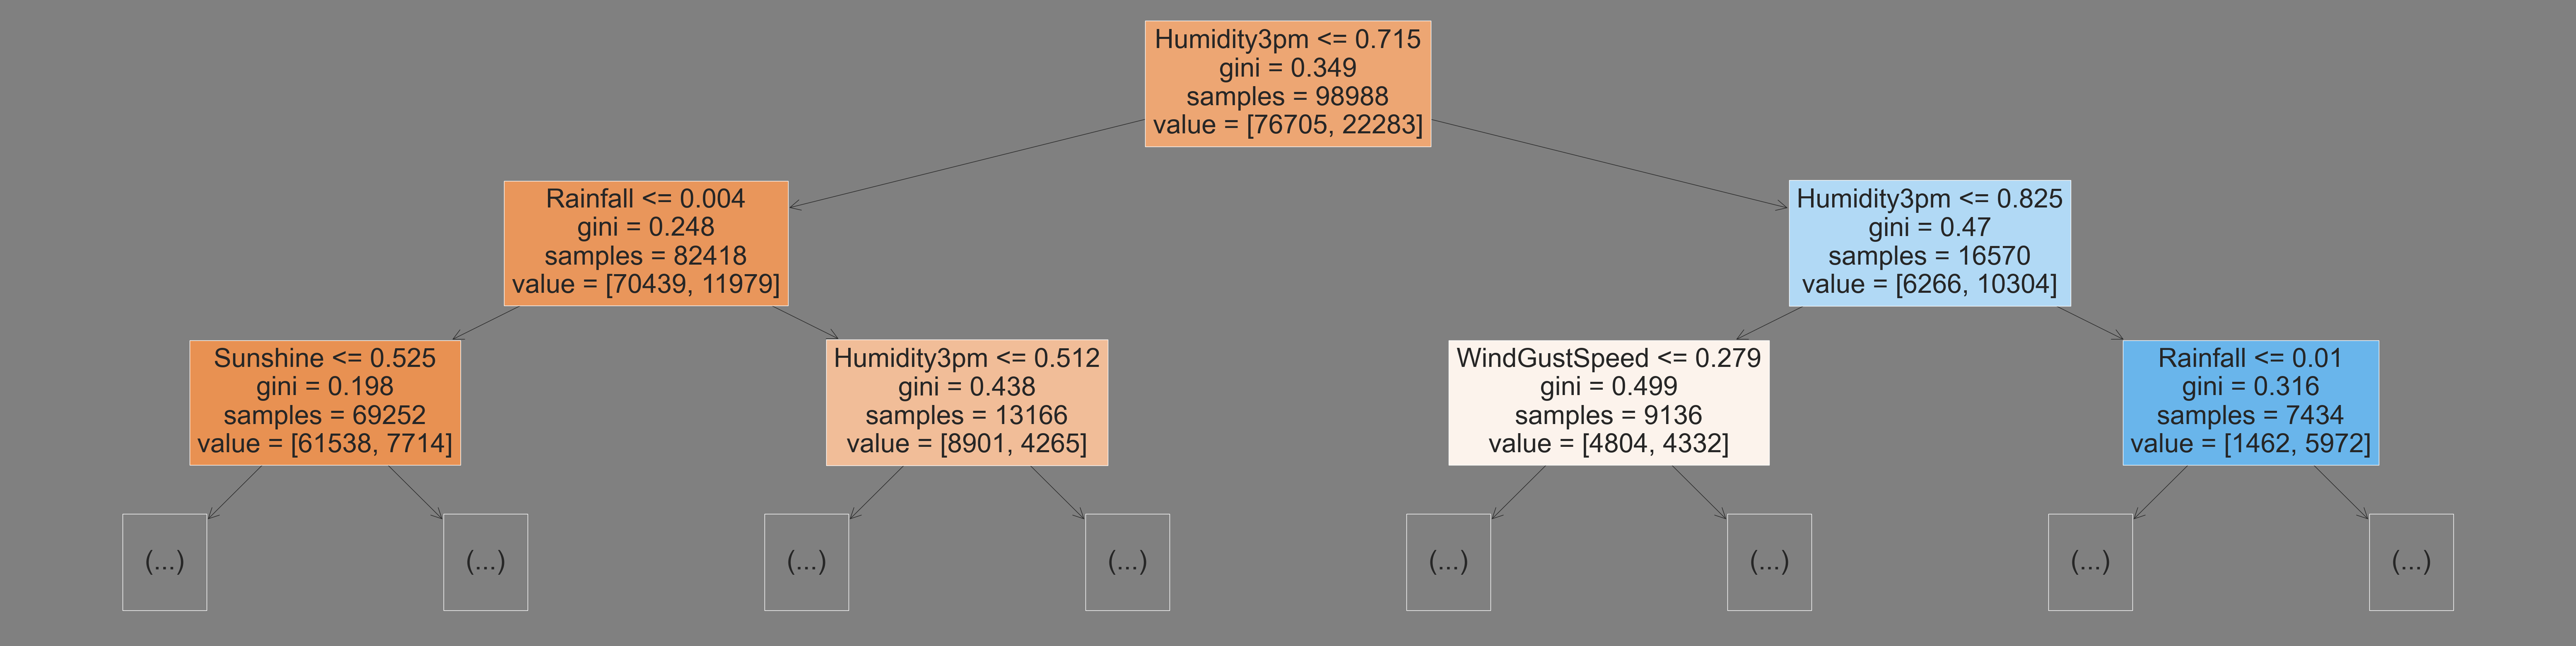

In [ ]:
plt.figure(figsize = (80,20))
plot_tree(model ,feature_names = x_train.columns, max_depth =2, filled=True );

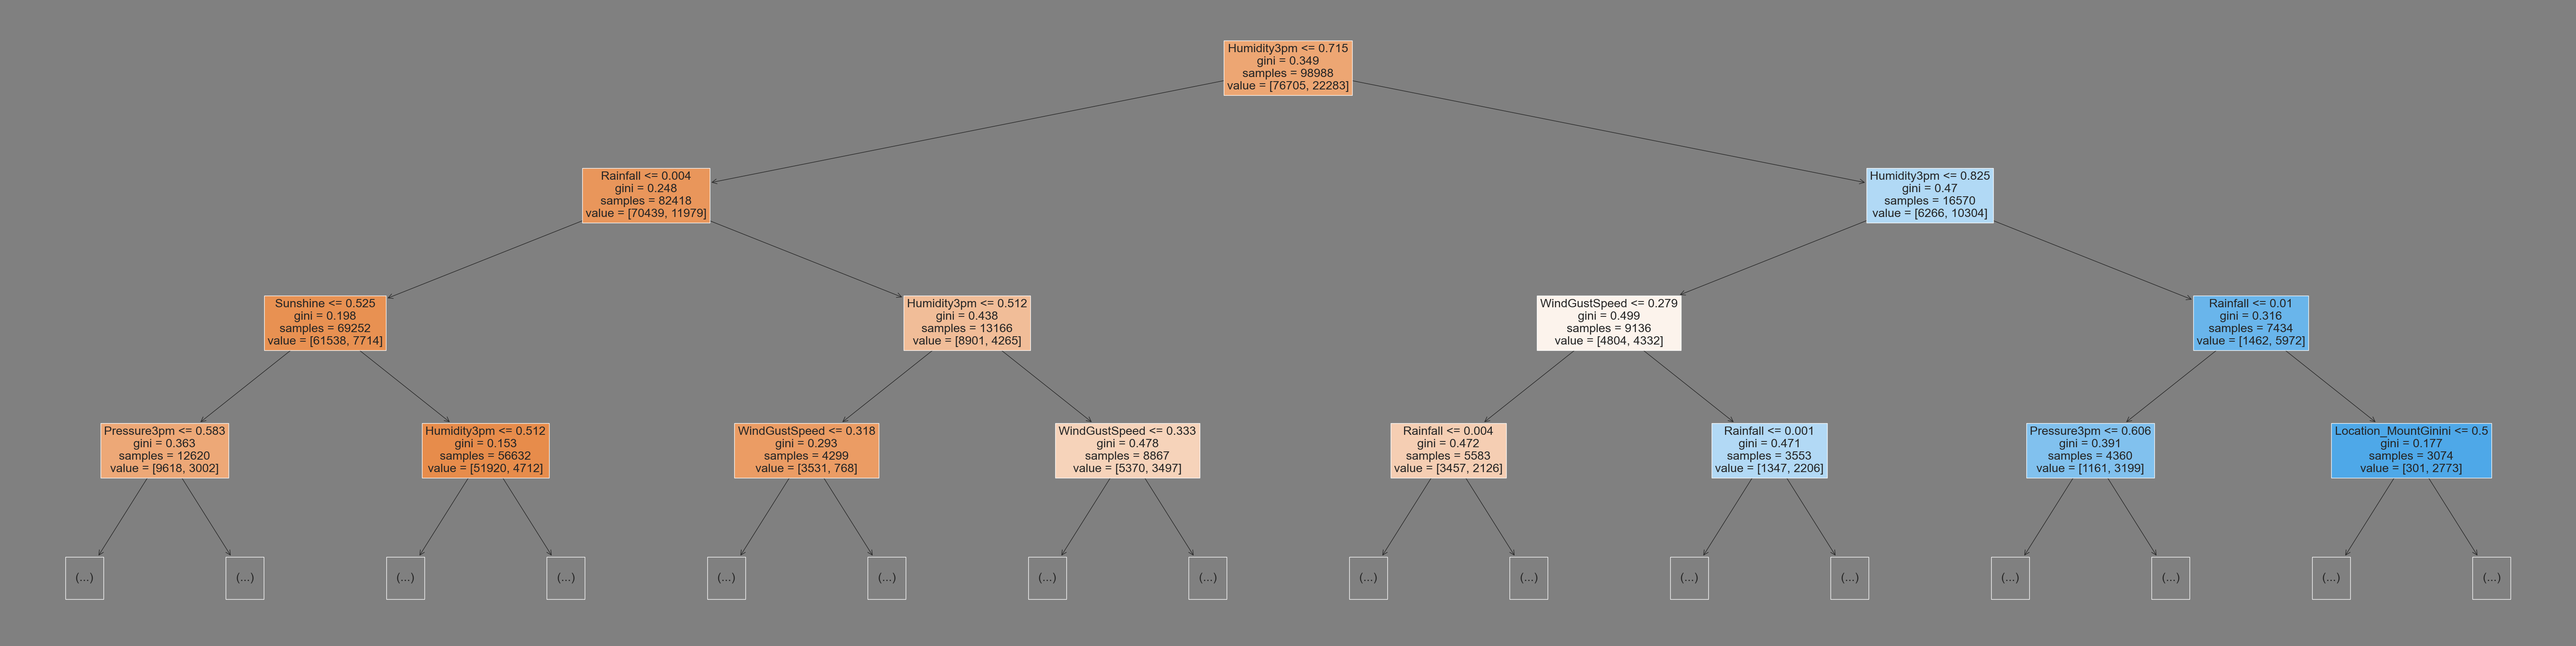

In [ ]:
plt.figure(figsize = (80,20))
plot_tree(model ,feature_names = x_val.columns, max_depth =3, filled=True );

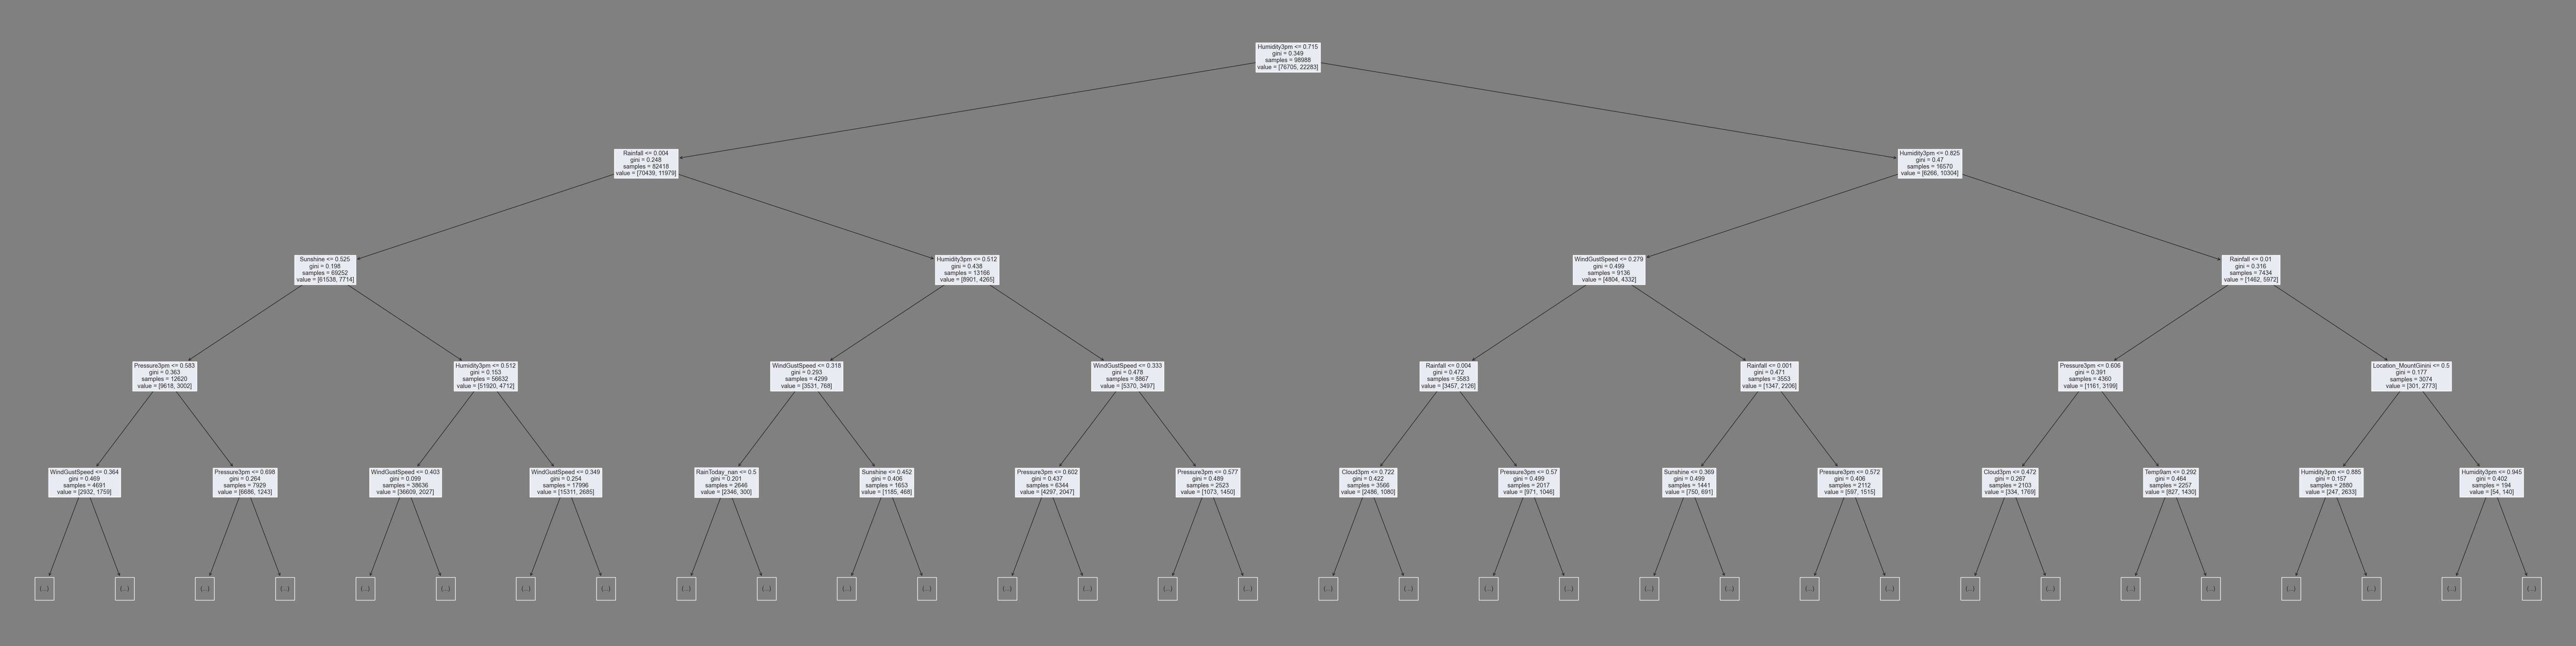

In [ ]:
plt.figure(figsize = (80,20))
plot_tree(model ,feature_names = x_test.columns, max_depth =4, filled=False);

="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://i.imgur.com/tlYiXnp.png" width="480">


Let's check the depth of the tree that was created.

In [ ]:
model.tree_.max_depth

48

In [ ]:
tree_text = export_text(model , max_depth =10,feature_names = list(x_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

Let's turn this into a dataframe and visualize the most important features.

In [ ]:
importance_df= pd.DataFrame({
    'features': x_train.columns,
    'importance': model.feature_importances_

}).sort_values('importance',ascending = False)

In [ ]:
importance_df.head(15)

features  importance
9     Humidity3pm    0.261441
11    Pressure3pm    0.062057
2        Rainfall    0.059139
5   WindGustSpeed    0.056333
4        Sunshine    0.049465
8     Humidity9am    0.040218
14        Temp9am    0.035000
0         MinTemp    0.034894
10    Pressure9am    0.034415
1         MaxTemp    0.032361
15        Temp3pm    0.030406
7    WindSpeed3pm    0.029813
6    WindSpeed9am    0.028021
3     Evaporation    0.024962
13       Cloud3pm    0.016923

<Axes: title={'center': 'Features  Importances'}, xlabel='importance', ylabel='features'>

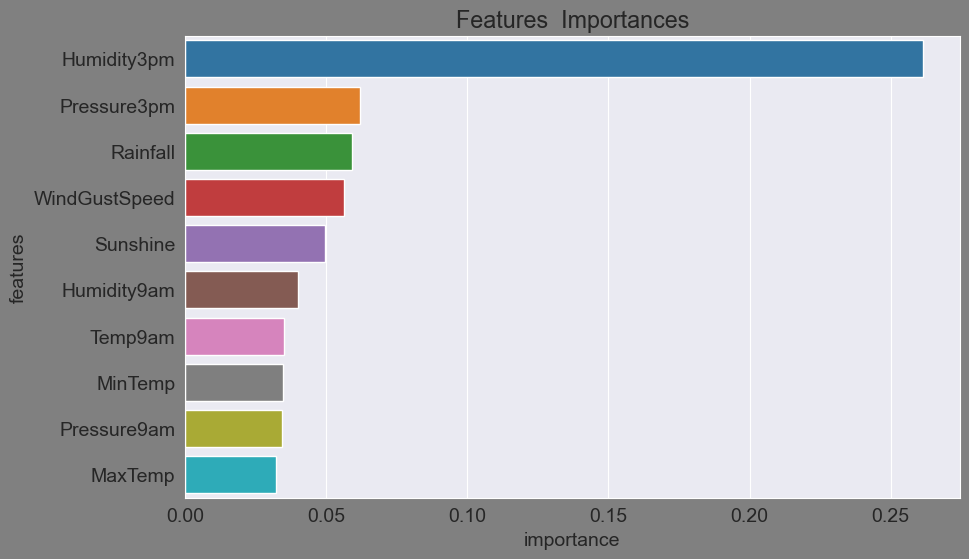

In [ ]:
plt.title('Features  Importances')
sns.barplot(data = importance_df.head(10),y='features',x= 'importance')

# `Hyperparameter Tuning and Overfitting`

` in this section, we'll look at some strategies for reducing overfitting.`

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:
`
max_dep`t`h
max_leaf_no`es


### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [ ]:
model = DecisionTreeClassifier(max_depth =3, random_state =42)

In [ ]:
model.fit(x_train,train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(x_train,train_target)

0.8291308037337859

In [ ]:
model.score(x_val,val_target)

0.8334397307178921

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

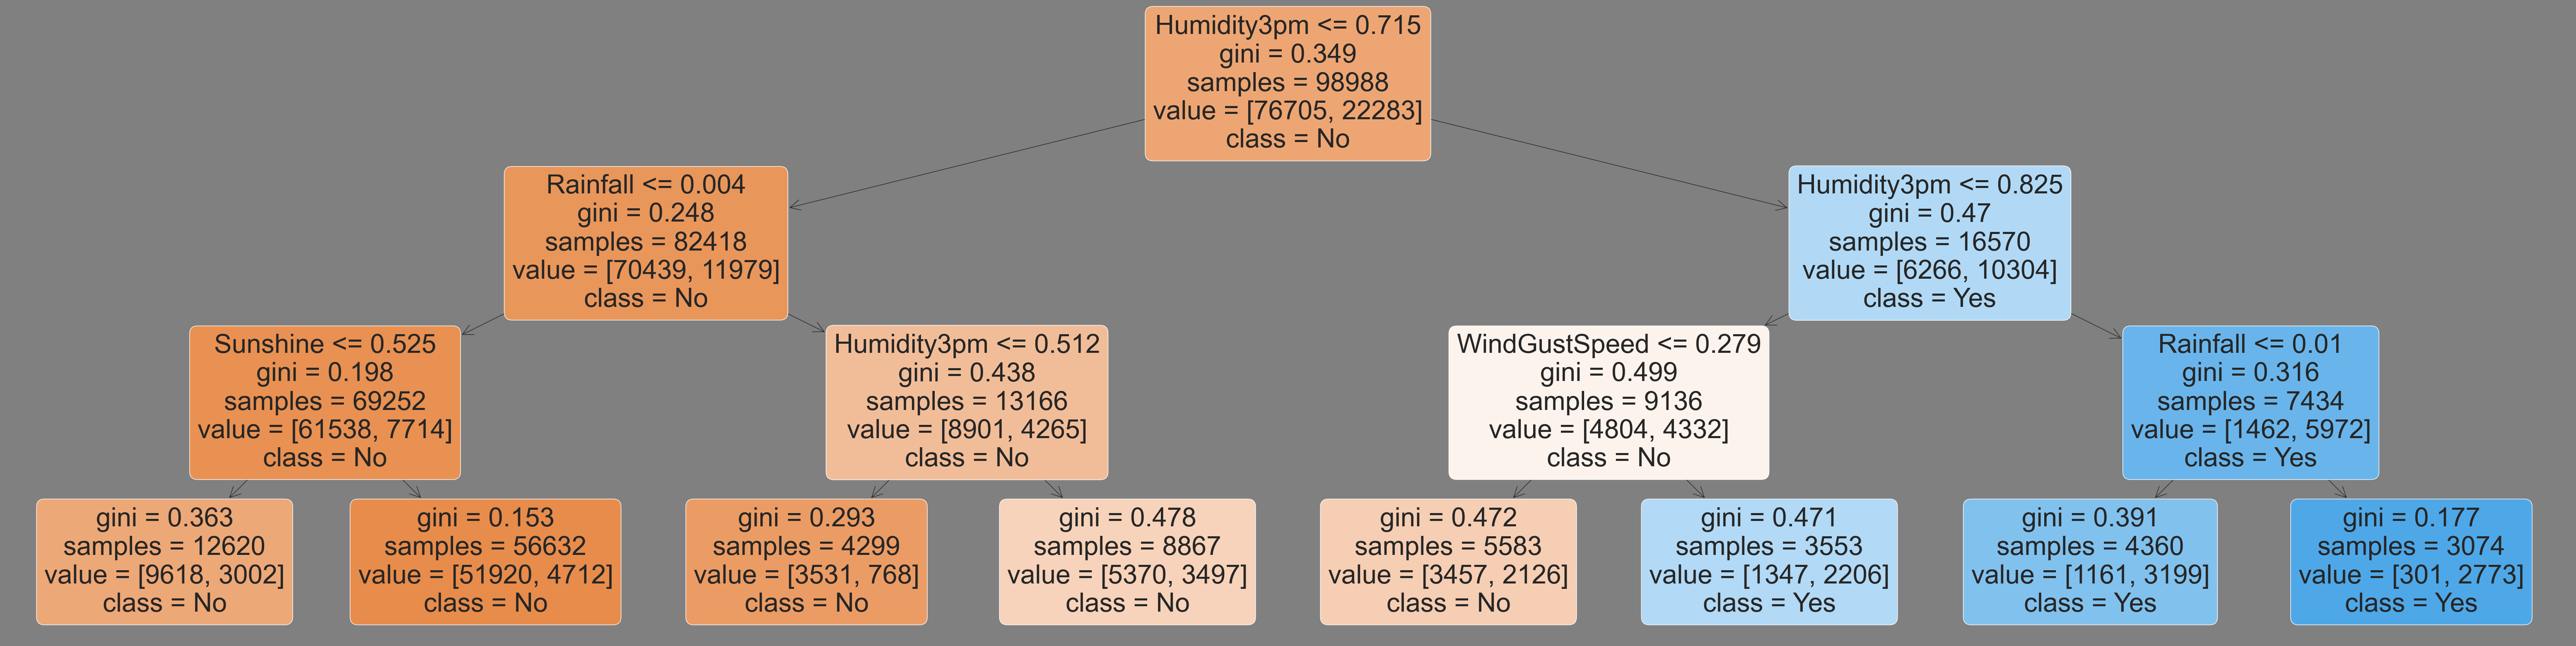

In [ ]:
plt.figure(figsize =(80,20))
plot_tree(model,feature_names = x_train.columns , filled = True,rounded=True, class_names = model.classes_);

In [ ]:
print(export_text(model,feature_names=list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Let's `experiment` with different depths using a helper function.

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state =42)
    model.fit(x_train,train_target)
    train_acc = 1 - model.score(x_train,train_target)
    val_acc = 1- model.score(x_val ,val_target)
    return {'Max depth': md, 'Training Error': train_acc,'Validation Error': val_acc}

In [ ]:
%%time
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

CPU times: total: 58.3 s
Wall time: 1min 6s


In [ ]:
error_df

Max depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156271          0.157275
6           7        0.153312          0.154605
7           8        0.147806          0.158029
8           9        0.140906          0.156578
9          10        0.132945          0.157333
10         11        0.123227          0.159248
11         12        0.113489          0.160815
12         13        0.101750          0.163833
13         14        0.089981          0.167373
14         15        0.078999          0.171261
15         16        0.068180          0.174279
16         17        0.058138          0.176890
17         18        0.048733          0.181243
18         19        0.040025          0.187569
19         20        0.032539          0.190297

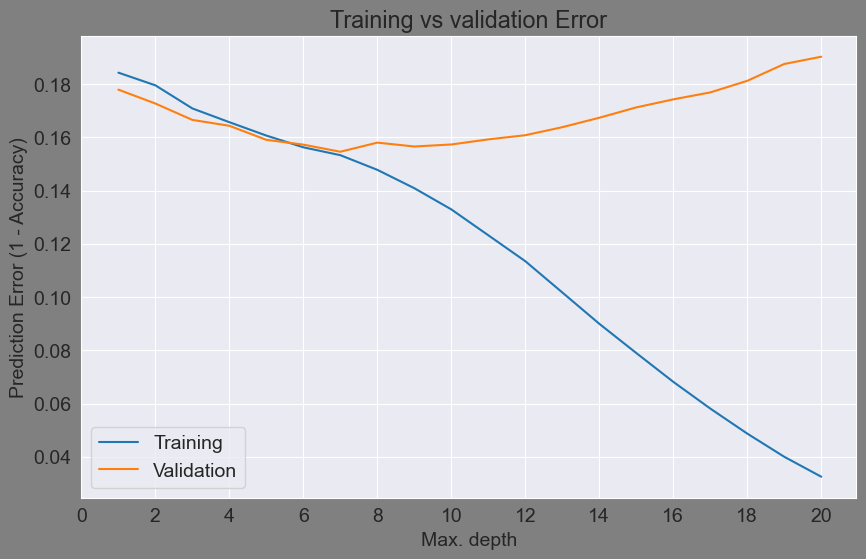

In [ ]:
plt.figure()
plt.plot(error_df['Max depth'],error_df['Training Error'])
plt.plot(error_df['Max depth'],error_df['Validation Error'])
plt.title('Training vs validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max. depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training','Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">




In [ ]:
model = DecisionTreeClassifier(max_depth =7,random_state = 42).fit(x_train,train_target)
model.score(x_val,val_target)

0.8453949277465034

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [ ]:
model = DecisionTreeClassifier(random_state =42 , max_leaf_nodes = 128)

In [ ]:
model.fit(x_train,train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(x_train,train_target)

0.8480421869317493

In [ ]:
model.score(x_val,val_target)

0.8442342290058615

In [ ]:
model.tree_.max_depth

12

In [ ]:
model_text = export_text(model,feature_names = list(x_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

# Training a Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs = -1,random_state =42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [ ]:
%%time
model.fit(x_train,train_target)

CPU times: total: 55.3 s
Wall time: 16 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train,train_target)

0.9999494888269285

In [ ]:
model.score(x_val, val_target)


0.8566537055307295

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging

In [ ]:
train_probs = model.predict_proba(x_train)


In [ ]:
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

We can can access individual decision trees using `model.estimators_`

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

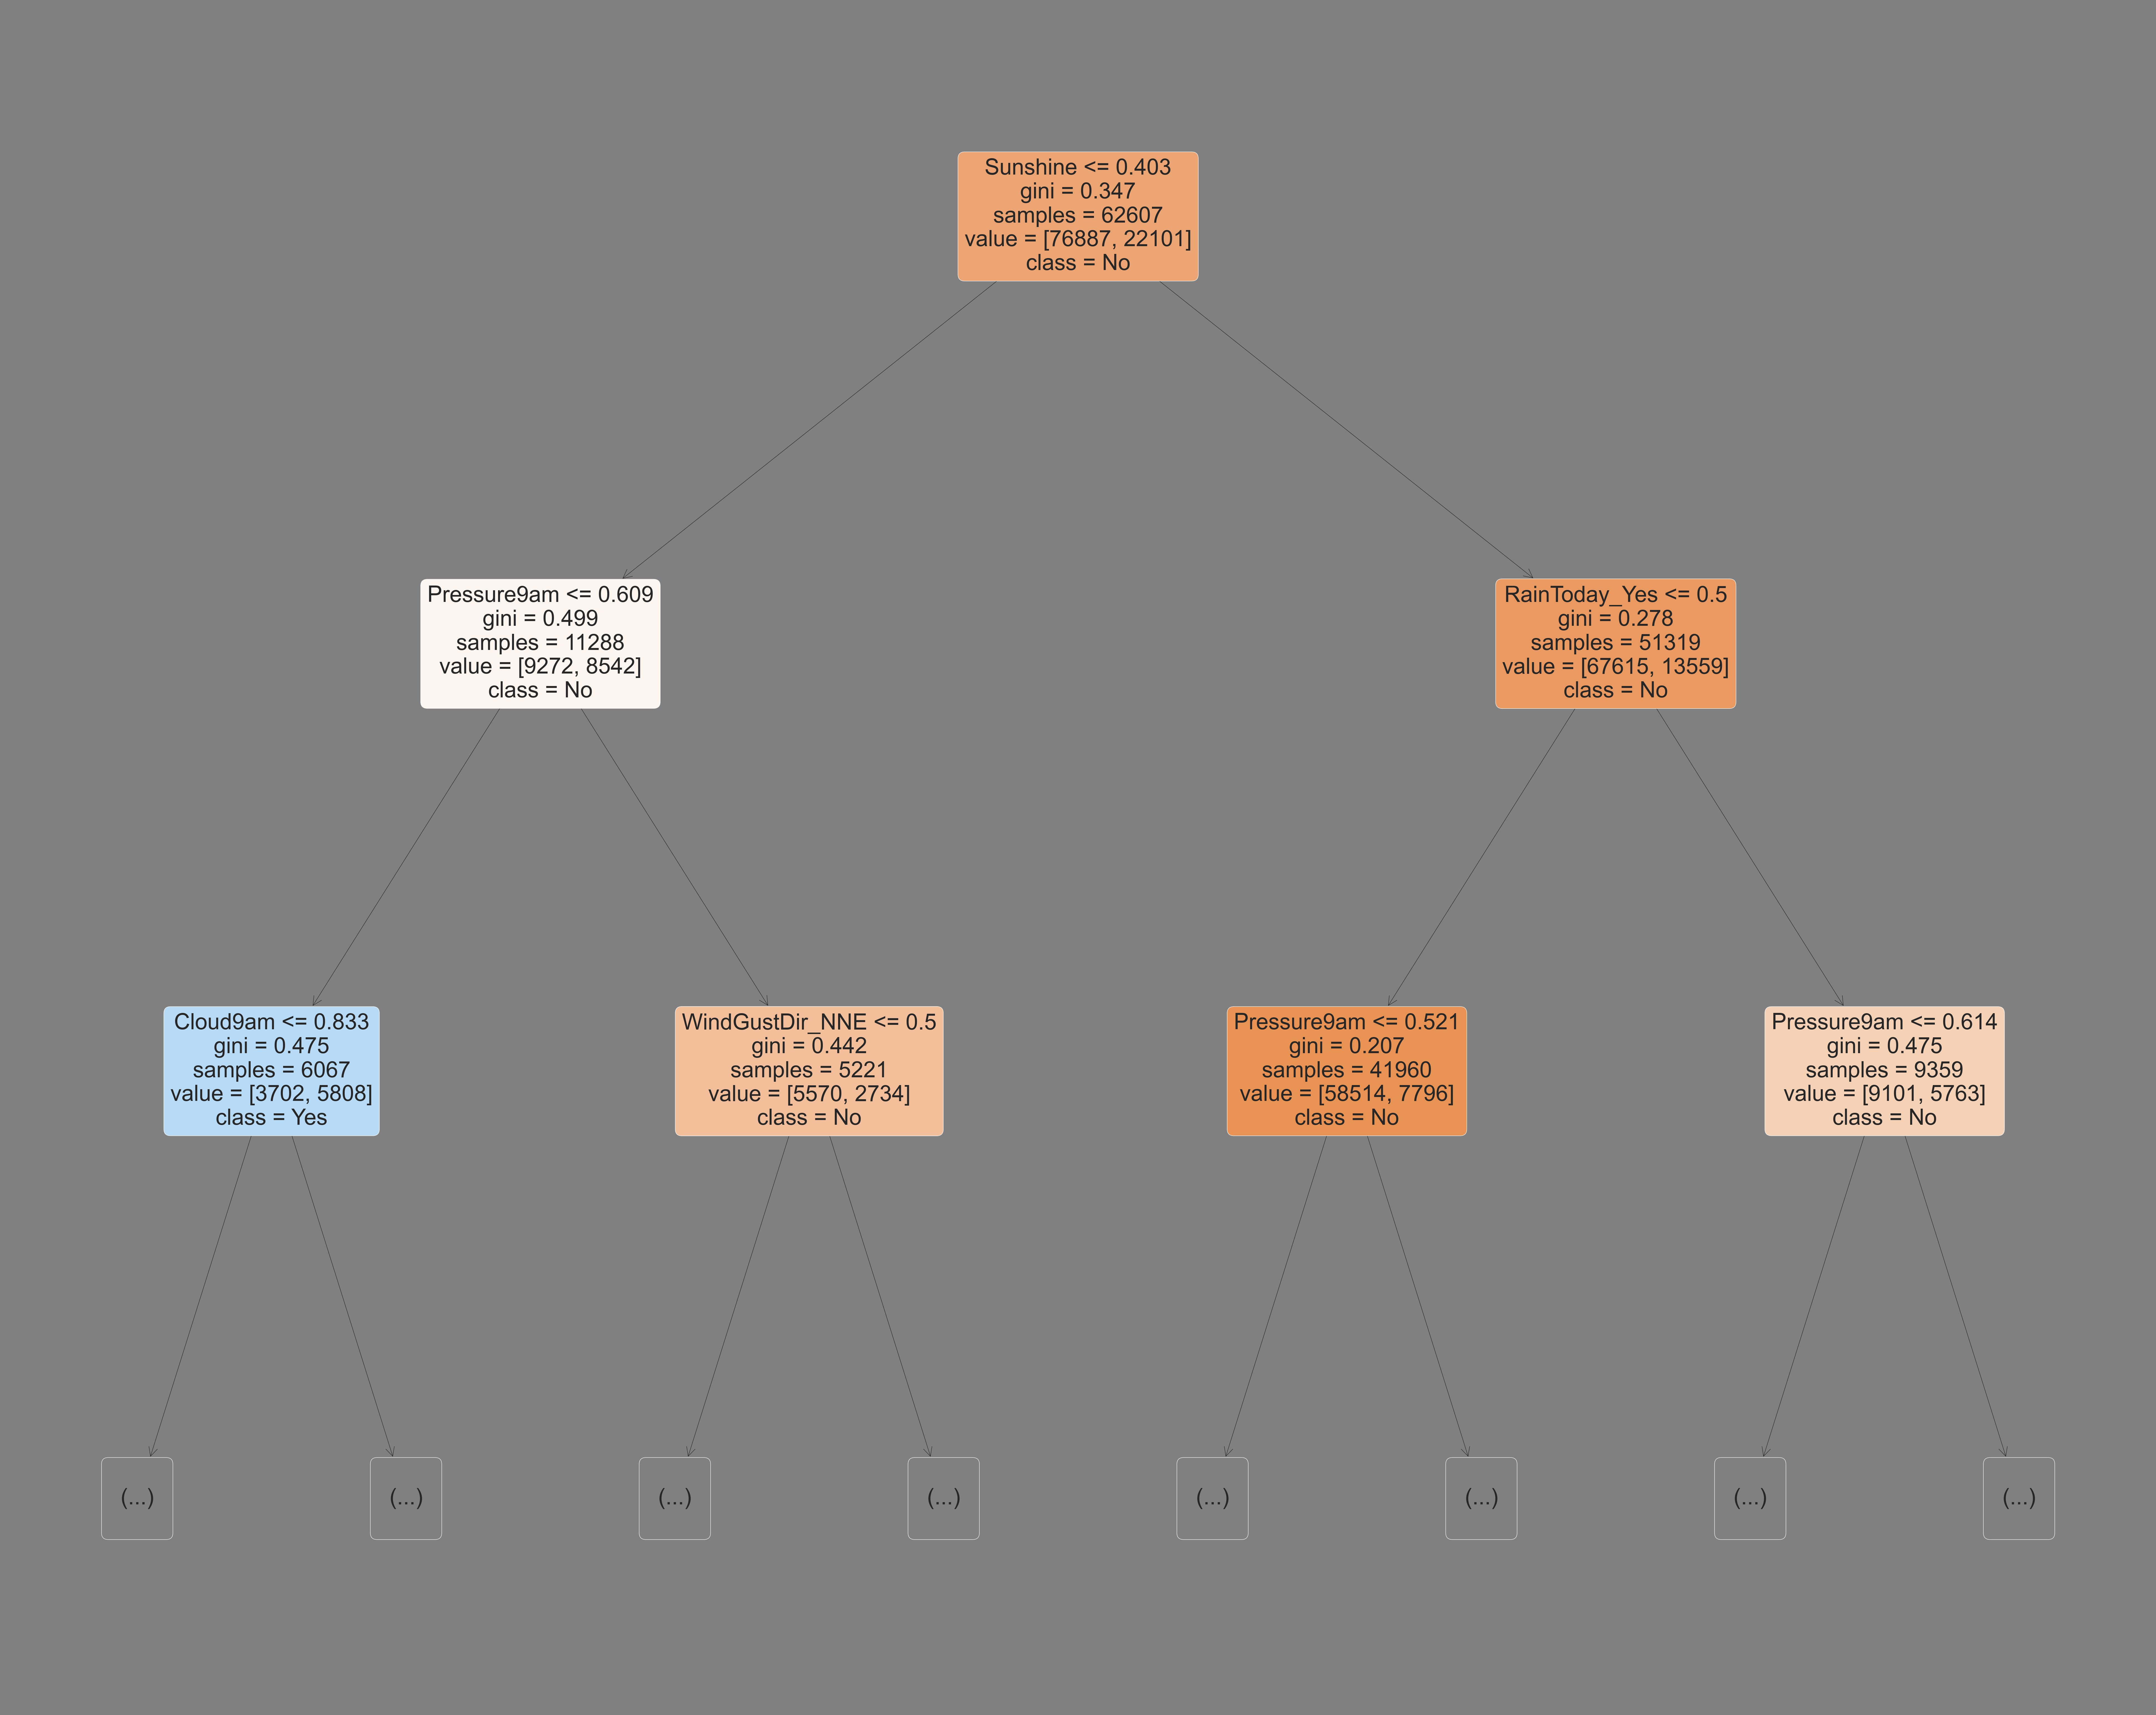

In [ ]:
plt.figure(figsize = (100,80))
plot_tree(model.estimators_[0],max_depth =2,feature_names=x_train.columns ,filled =True ,rounded =True,class_names = model.classes_ );

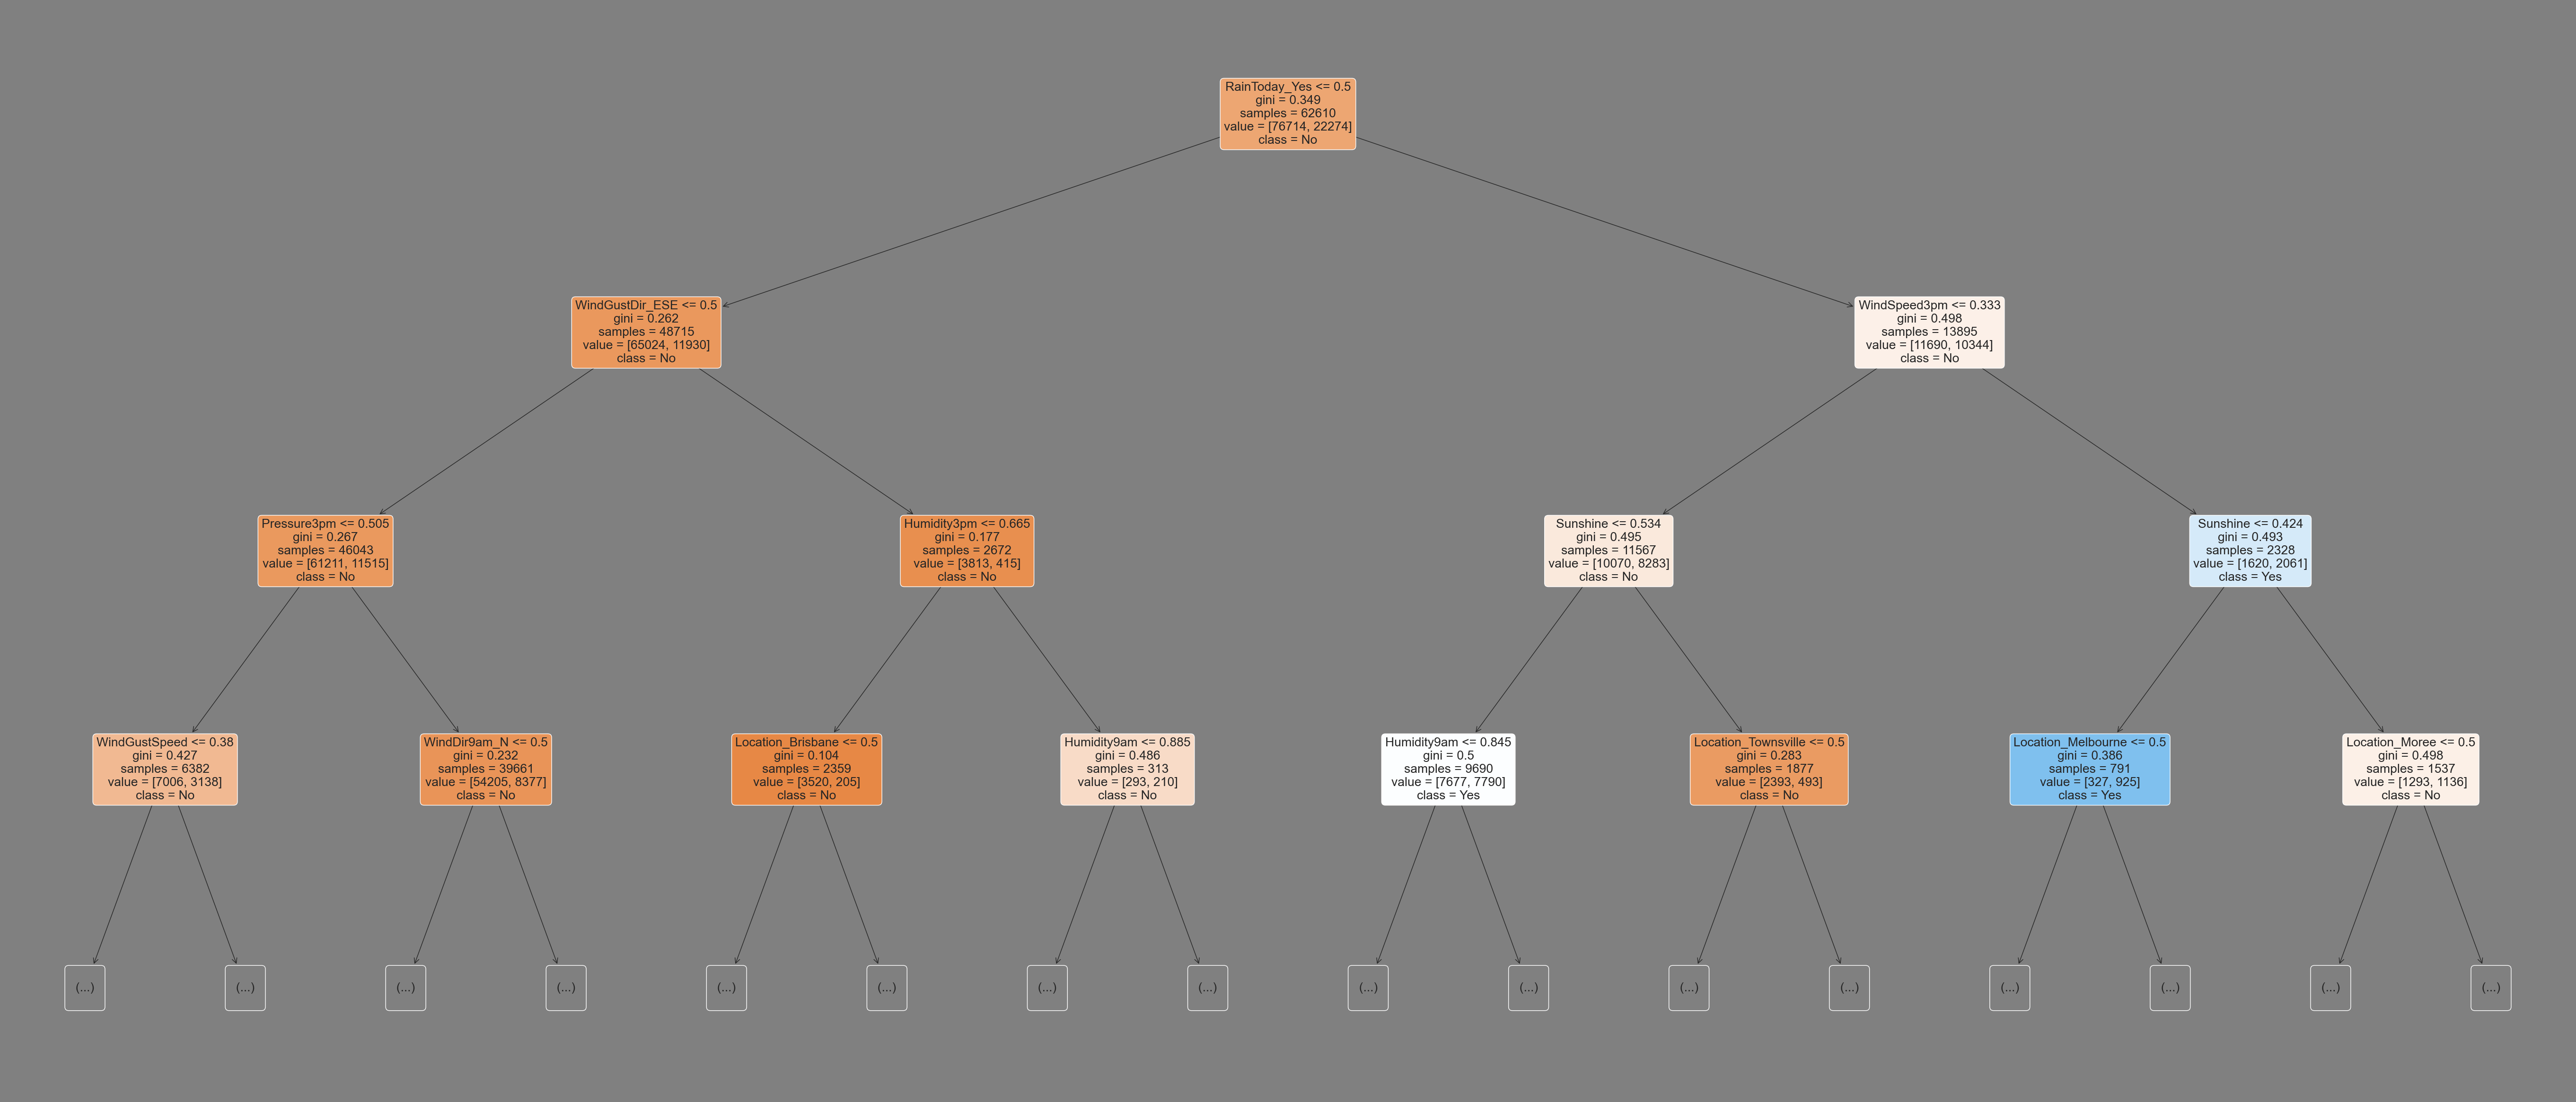

In [ ]:
plt.figure(figsize=(70,30))
plot_tree(model.estimators_[20],feature_names = x_train.columns,max_depth = 3,filled =True,rounded=True ,class_names =model.classes_ );

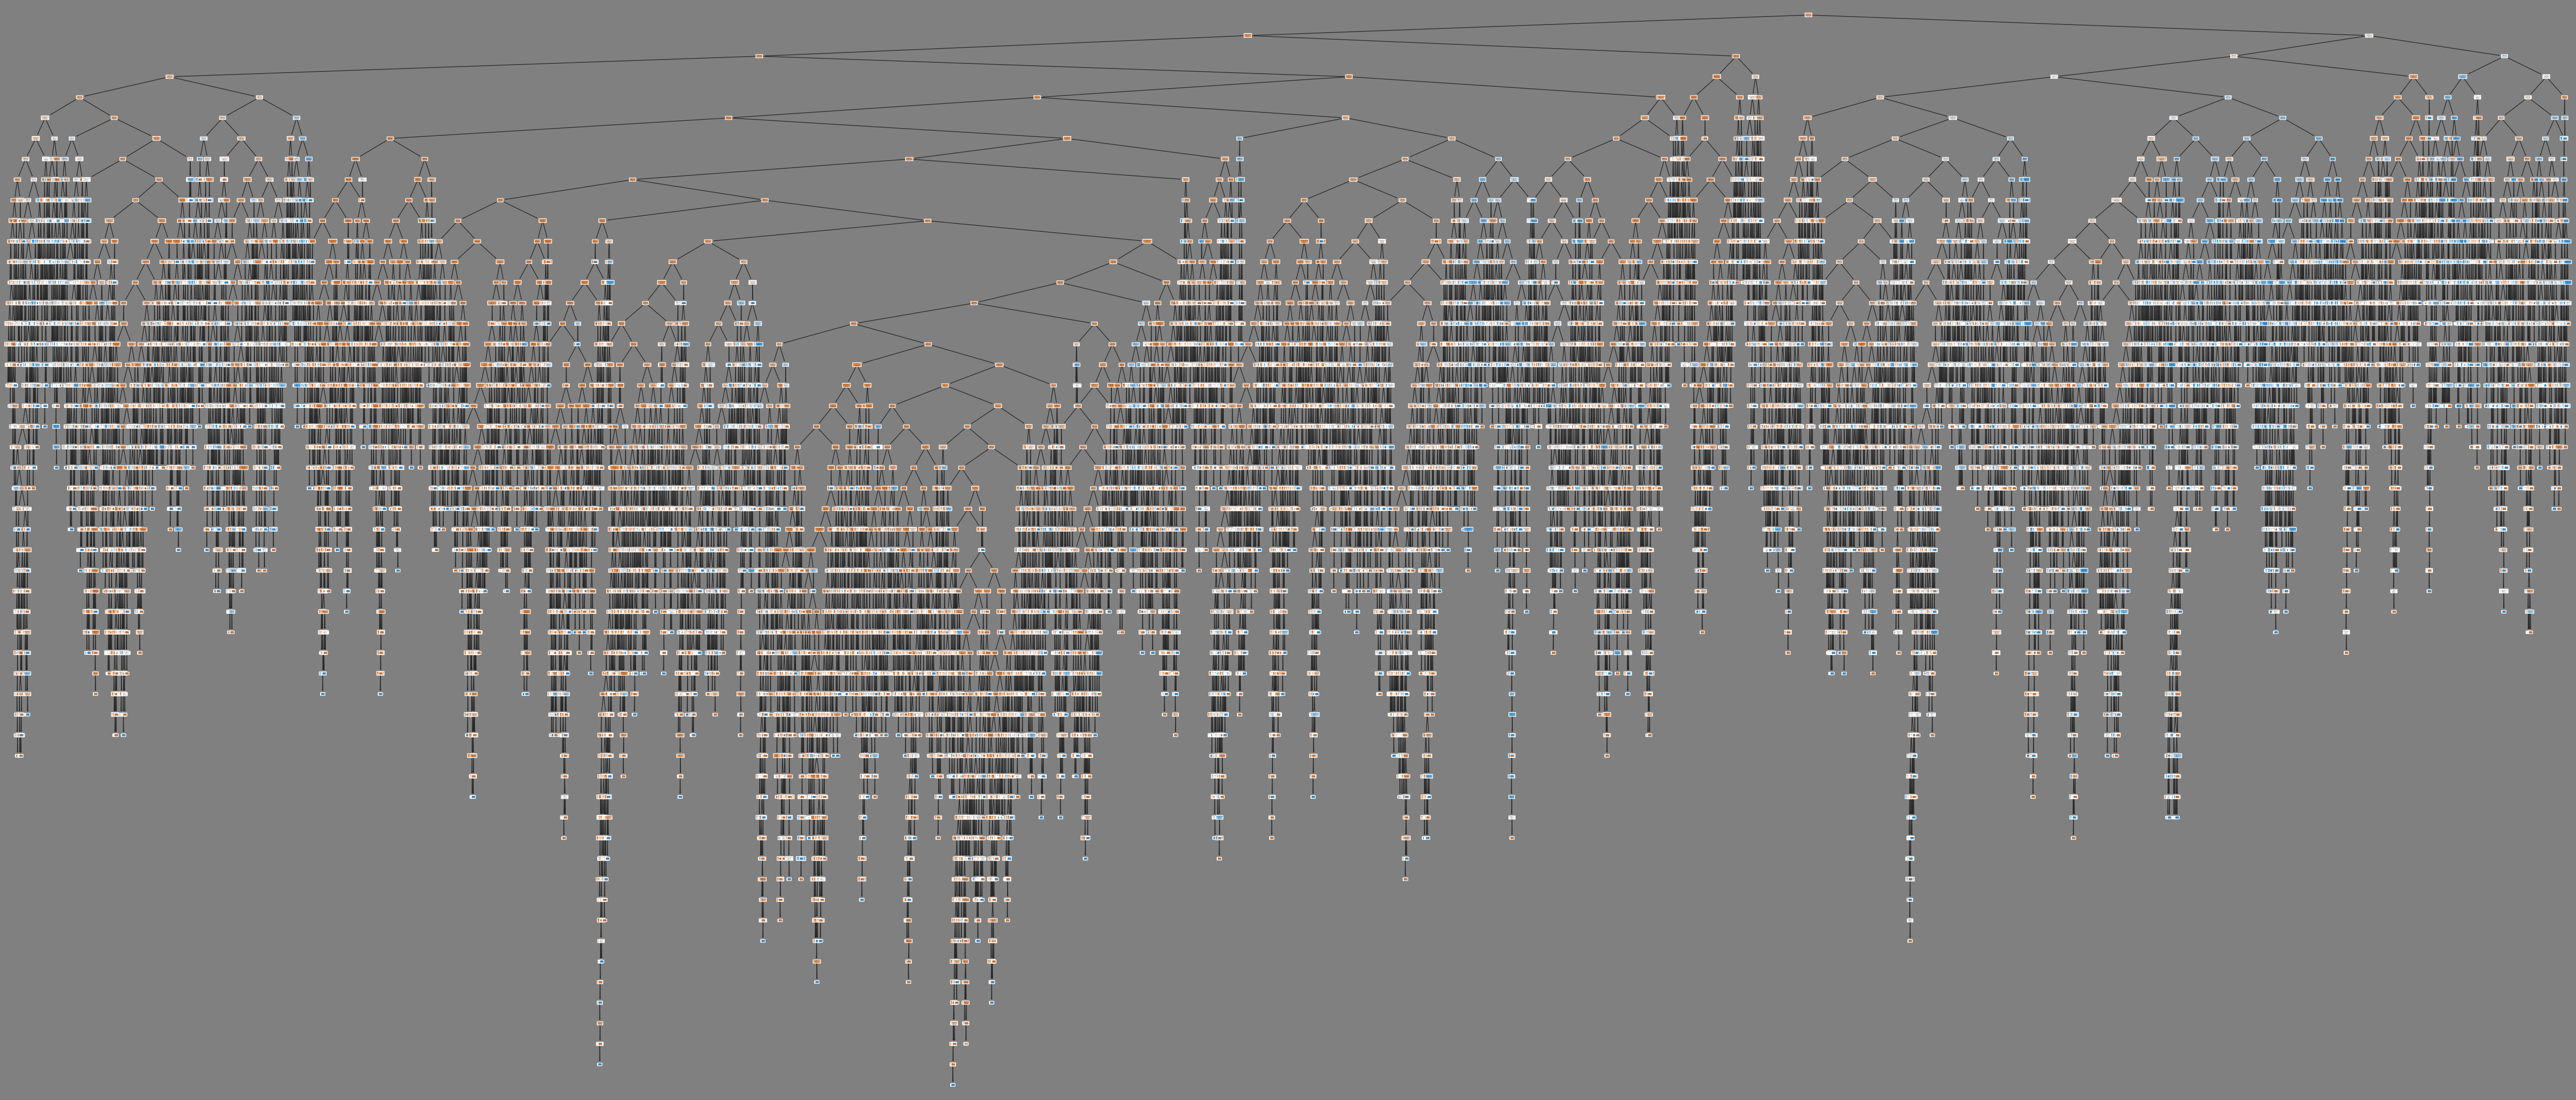

In [ ]:
plt.figure(figsize=(70,30))
plot_tree(model.estimators_[20],feature_names = x_train.columns,max_depth = None,filled =True,rounded=True ,class_names =model.classes_ );

In [ ]:
len(model.estimators_)

100

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [ ]:
import_df = pd.DataFrame({
    'features':x_train.columns,
    'Importances':model.feature_importances_

}).sort_values('Importances',ascending=False)

In [ ]:
import_df.head(10)

features  Importances
9     Humidity3pm     0.139904
4        Sunshine     0.053696
11    Pressure3pm     0.052713
8     Humidity9am     0.050051
2        Rainfall     0.048077
10    Pressure9am     0.047944
5   WindGustSpeed     0.047477
15        Temp3pm     0.044379
1         MaxTemp     0.041865
0         MinTemp     0.041199

<Axes: title={'center': 'Feature Importance'}, xlabel='Importances', ylabel='features'>

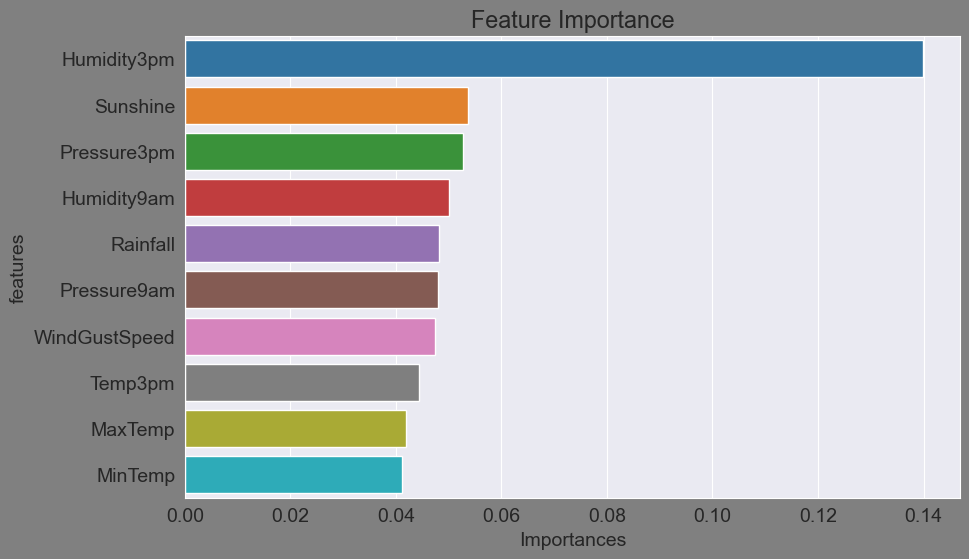

In [ ]:
plt.title('Feature Importance')
sns.barplot(data = import_df.head(10),x='Importances',y='features')

# Hyperparameter Tuning with Random Forests

In [ ]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [ ]:
base_model =RandomForestClassifier(random_state =42,n_jobs=-1).fit(x_train,train_target)

In [ ]:
base_model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
base_train_acc=base_model.score(x_train,train_target)
base_val_cc = base_model.score(x_val,val_target)
base_test_acc = base_model.score(x_test,test_target)

In [ ]:
base_train_acc

0.9999494888269285

In [ ]:
base_val_cc

0.8566537055307295

In [ ]:
base_test_acc

0.8447678447678447

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed


**10 estimators**

In [ ]:
model =RandomForestClassifier(random_state=42 ,n_jobs =-1,n_estimators = 10)

In [ ]:
model.fit(x_train,train_target)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train,train_target), model.score(x_val,val_target)

(0.986958015112943, 0.8485868492832686)

`500 Estimators`

In [ ]:
model =RandomForestClassifier(random_state=42 ,n_jobs =-1,n_estimators = 500)

In [ ]:
model.fit(x_train,train_target)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train,train_target), model.score(x_val,val_target)

(0.9999797955307714, 0.8577563693343393)

`max_depth` and `max_leaf_nodes`
These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. `You can specify a max_depth to reduce overfitting`

In [ ]:
### `max_depth` and `max_leaf_nodes`

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

SyntaxError: invalid syntax (4200120593.py, line 3)

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state =42,n_jobs=-1, **params).fit(x_train,train_target)
    return model.score(x_train,train_target), model.score(x_val ,val_target)

In [ ]:
test_params(max_depth= 5)

(0.8197862367155615, 0.8240961058557251)

In [ ]:
test_params(max_depth =99)

(0.9999494888269285, 0.8566537055307295)

In [ ]:
test_params(max_depth = 89)

(0.9999494888269285, 0.8566537055307295)

In [ ]:
test_params(max_depth = 2**5)

(0.996221764254253, 0.8577563693343393)

In [ ]:
test_params(max_depth = 2**33)

(0.9999494888269285, 0.8566537055307295)

# max_features

`max_features : {"sqrt", "log2", None}, int or float, default="sqrt"`

In [ ]:
test_params(max_features = 'log2')

(0.9999595910615429, 0.8558992513493123)

In [ ]:
test_params(max_features = 10)

(0.9999494888269285, 0.8566537055307295)

In [ ]:
test_params(max_features = 5)

(0.9999393865923142, 0.8553769369160235)

In [ ]:
test_params(max_features = 77)

(0.9999191821230856, 0.8566537055307295)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [ ]:
test_params(min_samples_split =7,min_samples_leaf=10)

(0.8782781751323393, 0.8517787708200336)

In [ ]:
test_params(min_samples_split =10,min_samples_leaf=20)

(0.8634986058916232, 0.8504439672682955)

In [ ]:
test_params(min_samples_split =20,min_samples_leaf=30)

(0.8575281852345739, 0.8475422204166908)

In [ ]:
test_params(min_samples_split =15,min_samples_leaf=50)

(0.8519416494928678, 0.8464395566130811)

In [ ]:
test_params(min_samples_split =40,min_samples_leaf=70)

(0.8481230048086636, 0.8448145783761825)

# min_impurity_decrease

In [ ]:
test_params(min_impurity_decrease=10)

(0.774891906089627, 0.7882885497069235)

In [ ]:
test_params(min_impurity_decrease=1e-9)

(0.9999595910615429, 0.857001915152922)

In [ ]:
test_params(min_impurity_decrease=1e-19)

(0.9999494888269285, 0.8566537055307295)

In [ ]:
test_params(min_impurity_decrease=1e+27)

(0.774891906089627, 0.7882885497069235)

# bootstrap, max_samples

In [ ]:
test_params(bootstrap =False)

(0.9999797955307714, 0.8567697754047937)

In [ ]:
test_params(bootstrap =True)

(0.9999494888269285, 0.8566537055307295)

In [ ]:
test_params(max_samples = 0.9)

(0.9997676486038711, 0.8565376356566653)

In [ ]:
test_params(max_samples =0.67)

(0.9927769022507779, 0.8562474609715048)

# class_weight

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
test_params(class_weight = 'balanced_subsample')

(0.9999595910615429, 0.8550287272938308)

In [ ]:
test_params(class_weight = 'balanced')

(0.9999595910615429, 0.8553769369160235)

In [ ]:
test_params(class_weight = {'No':1,'Yes':2})

(0.9999595910615429, 0.8558412164122802)

# Putting it together

In [ ]:
model= RandomForestClassifier(random_state =42,n_jobs=-1,n_estimators = 500,max_features =7,max_depth=30,class_weight = {'No':1,'Yes':1.5})

In [ ]:
model.fit(x_train,train_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
model.score(x_train,train_target),model.score(x_val,val_target)

(0.9920192346547057, 0.8563054959085369)

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145454       NaN           E           31.0        ESE          E   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2       NaN       NaN      9.4     20.9        No   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145454           No  
145455           No  
145456           No  
145457           No  
145458           No  

[142193 rows x 23 columns]

In [ ]:
model.score(x_test,test_target)

0.8451913451913452

`Notice that the test accuracy is lower`

# Making Predictions on New Inputs

In [ ]:
def predict_input(model,single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] =scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_col])
    x_input =input_df[numeric_cols + encoded_cols]
    pred = model.predict(x_input)[0]
    prob = model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    return pred , prob

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
predict_input(model,new_input)

C:\Users\ABDULLAH COMPUTERS\AppData\Local\Temp\ipykernel_13304\3562514157.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_col])
C:\Users\ABDULLAH COMPUTERS\AppData\Local\Temp\ipykernel_13304\3562514157.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_col])
C:\Users\ABDULLAH COMPUTERS\AppData\Local\Temp\ipykernel_13304\3562514157.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

('Yes', 0.7608595348304203)

In [ ]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

# Saving and Loading Trained Models

In [ ]:
import joblib

In [ ]:
aussie_rain = {
    'imputer':imputer,
    'scaler':scaler,
    'model':model,
    'encoder':encoder,
    'encoded_cols':encoded_cols,
    'numeric_cols':numeric_cols,
    'categorical_col':categorical_col,
    'input_cols':input_cols,
    'target_col':target_col
}

In [ ]:
joblib.dump(aussie_rain,'aussie_rain.jobli')